## Demonstration of auto co-relation function and partial co-relation

###Note
- A plot of the auto correlation of a time series by tag is called the AutoCorrelation function , or the acronym ACF . This plot is sometimes cakked a corerelogrant or an autocorrelation plot . Partial autocorellation , on the other hand maeasures the corelation between the Time Series and the lag , while controlling for the effects of intermediate lags . It removes the influence of shorter lags to provide a clear picture of the direct relationship between the time series and a specific lag , Significant lag(outside the confidence interval in the plot) suggest important lags to include in the model

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import STL
import warnings
warnings.filterwarnings('ignore')


In [6]:
df=pd.read_csv('/content/AirPassengers.csv',parse_dates=['Month'],index_col='Month')
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


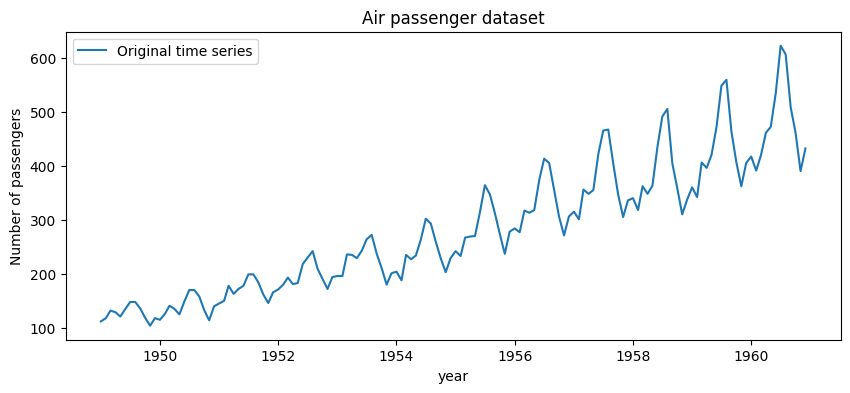

In [9]:
plt.figure(figsize=(10,4))
plt.plot(df.index,df['#Passengers'],label='Original time series')
plt.legend(loc='best')
plt.title('Air passenger dataset')
plt.xlabel('year')
plt.ylabel('Number of passengers')
plt.show()

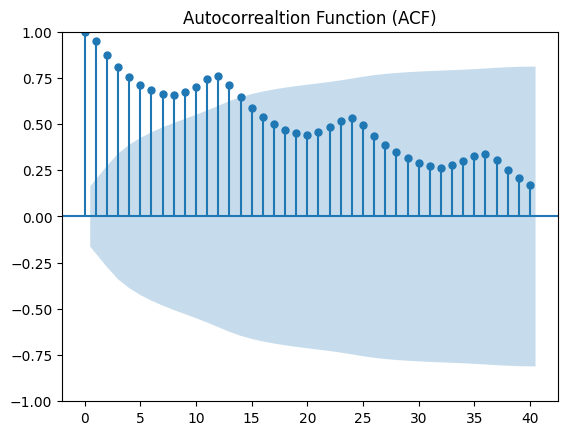

In [21]:
# Ploting the Auto cosrrelation function  ACF
plot_acf(df['#Passengers'],lags=40,alpha=0.05)
plt.title('Autocorrealtion Function (ACF)')
plt.show()


- Peaks at certain lags suggest seasonal pattern or repeated cycles . For example, the ACF may show strong correaltion at a lag of 12 , indicating yearly seasonality

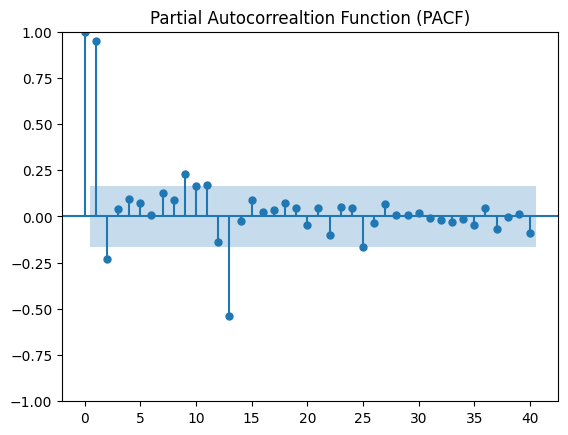

In [24]:
plot_pacf(df['#Passengers'],lags=40,alpha=0.05,method='ywm')
plt.title('Partial Autocorrealtion Function (PACF)')
plt.show()

In [25]:
# Numerical values of ACF and PACF
act_values = acf(df['#Passengers'],nlags=40,fft=True) # Fast Furier Analysis
pacf_values = pacf(df['#Passengers'],nlags=40,method='ywm')

In [28]:
print('Autocorrelation Function (ACF) : ')
print(act_values)
print('\nPartial Autocorrelation Function (PACF) : ')
print(pacf_values)

Autocorrelation Function (ACF) : 
[1.         0.94804734 0.87557484 0.80668116 0.75262542 0.71376997
 0.6817336  0.66290439 0.65561048 0.67094833 0.70271992 0.74324019
 0.76039504 0.71266087 0.64634228 0.58592342 0.53795519 0.49974753
 0.46873401 0.44987066 0.4416288  0.45722376 0.48248203 0.51712699
 0.53218983 0.49397569 0.43772134 0.3876029  0.34802503 0.31498388
 0.28849682 0.27080187 0.26429011 0.27679934 0.2985215  0.32558712
 0.3370236  0.30333486 0.25397708 0.21065534 0.17217092]

Partial Autocorrelation Function (PACF) : 
[ 1.          0.94804734 -0.22942187  0.03814778  0.09378544  0.0736067
  0.0077276   0.12559713  0.08995134  0.23248854  0.16605126  0.17127442
 -0.1354311  -0.53969124 -0.02661014  0.09076498  0.02495556  0.03251557
  0.07343264  0.04844211 -0.04554168  0.04575294 -0.10017888  0.05243494
  0.04801413 -0.16274616 -0.03613503  0.06642377  0.00617612  0.00753714
  0.01935049 -0.01025146 -0.01831018 -0.02900136 -0.01480497 -0.0477246
  0.04620366 -0.0666976  -0

In [51]:
from statsmodels.tsa.ar_model import AutoReg
aic_values = [AutoReg(df['#Passengers'], lags=i).fit().aic for i in range(1, 51)]
best_lag = np.argmin(aic_values) + 1

for lag,aic in enumerate(aic_values,1):
  print(f'Lag {lag}: AIC = {aic}')

print('\n Best lags : ',best_lag)

Lag 1: AIC = 1414.2115189981973
Lag 2: AIC = 1391.0787207998922
Lag 3: AIC = 1378.8596376270543
Lag 4: AIC = 1369.12559178586
Lag 5: AIC = 1354.0894904661661
Lag 6: AIC = 1347.2125500500545
Lag 7: AIC = 1335.6179169105505
Lag 8: AIC = 1326.0977850412394
Lag 9: AIC = 1276.589295868981
Lag 10: AIC = 1260.6015428662208
Lag 11: AIC = 1142.7403648460681
Lag 12: AIC = 1089.9179595371425
Lag 13: AIC = 1025.9884694552948
Lag 14: AIC = 1005.2520817980411
Lag 15: AIC = 1000.0642217796612
Lag 16: AIC = 995.146398116295
Lag 17: AIC = 989.423342481486
Lag 18: AIC = 984.4924673335361
Lag 19: AIC = 973.1007874647083
Lag 20: AIC = 968.4988209741512
Lag 21: AIC = 962.305553393821
Lag 22: AIC = 945.5340685032759
Lag 23: AIC = 934.8477583965349
Lag 24: AIC = 930.0208159968519
Lag 25: AIC = 922.6522103498216
Lag 26: AIC = 916.6350523755424
Lag 27: AIC = 911.9893957142278
Lag 28: AIC = 905.2693274760735
Lag 29: AIC = 898.5568173670854
Lag 30: AIC = 893.0160041462067
Lag 31: AIC = 880.660503300208
Lag 32: A